In [ ]:
import numpy as np
import pandas as pd
import pandas_datareader as web
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler 
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [ ]:
#getting the stocks datasets
df = web.DataReader('INDUSINDBK.NS',data_source='yahoo',start='2020-06-01',end='2020-08-28')
#show the dataset
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-01,416.799988,401.049988,402.299988,410.100006,22990598,410.100006
2020-06-02,438.899994,404.250000,414.000000,434.700012,28744172,434.700012
2020-06-03,452.250000,426.100006,445.000000,432.350006,27908796,432.350006
2020-06-04,434.850006,405.000000,424.850006,415.049988,25795376,415.049988
2020-06-05,427.299988,411.200012,417.200012,422.350006,26349793,422.350006
...,...,...,...,...,...,...
2020-08-24,535.450012,516.000000,518.000000,529.150024,14887687,529.150024
2020-08-25,546.400024,530.200012,535.000000,536.500000,18377629,536.500000
2020-08-26,572.200012,538.450012,541.450012,567.650024,26850404,567.650024


In [ ]:
df.shape

(65, 6)

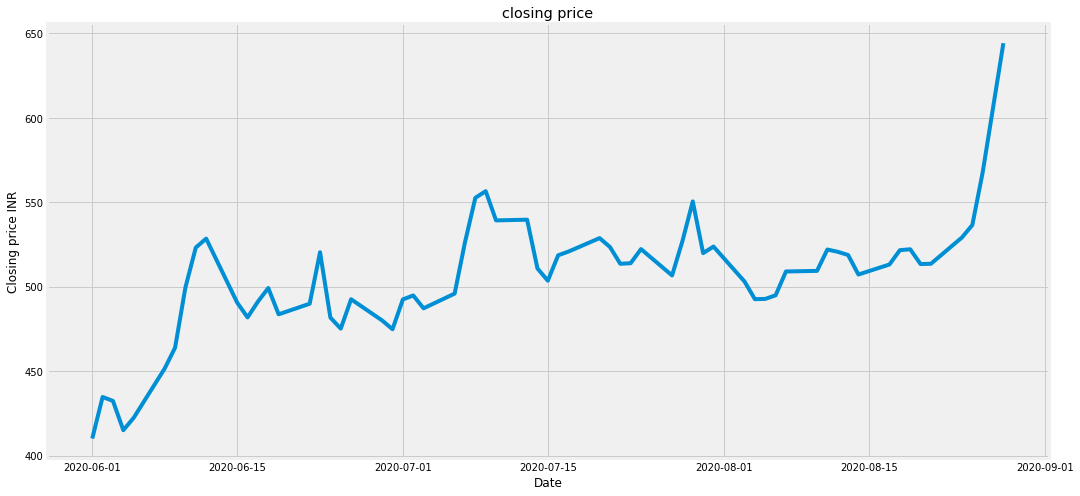

In [ ]:
#visualize the closing prices
plt.figure(figsize=(16,8))
plt.title('closing price')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Closing price INR')
plt.show()

In [ ]:
#create new database with only coloumns
data=df.filter(['Close'])
#convert the dataframe to numpy array
dataset=data.values
#get the number of rows to train
training_data_len=math.ceil(len(dataset)*0.8)
training_data_len

52

In [ ]:
#scale the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

In [ ]:
#create the training data
#create scaled training dataset
train_data = scaled_data[0:training_data_len, :]
#split the data to x_train and y_train
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])


In [ ]:
#convert x_train and y_train into numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)

In [ ]:
#reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

IndexError: ignored

In [ ]:
#build LSTM model
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM
model= Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
#train the model
model.fit(x_train,y_train,epochs=15)

RuntimeError: ignored

In [ ]:
#create the testing dataset
#createt new array
test_data=scaled_data[training_data_len-60:, :]
#create the dataset x_test and y_test
x_test=[]
y_test=dataset[training_data_len: , :]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i, 0])




In [ ]:
#convert the data to numpy 
x_test=np.array(x_test)


In [ ]:
#reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
#get the model predicted value
predictions =model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

In [ ]:
#geting the root_mean_squared error(RMSE)
rmse=np.sqrt( np.mean(predictions-y_test)**2)
rmse


14.502111434936523

In [ ]:
#plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


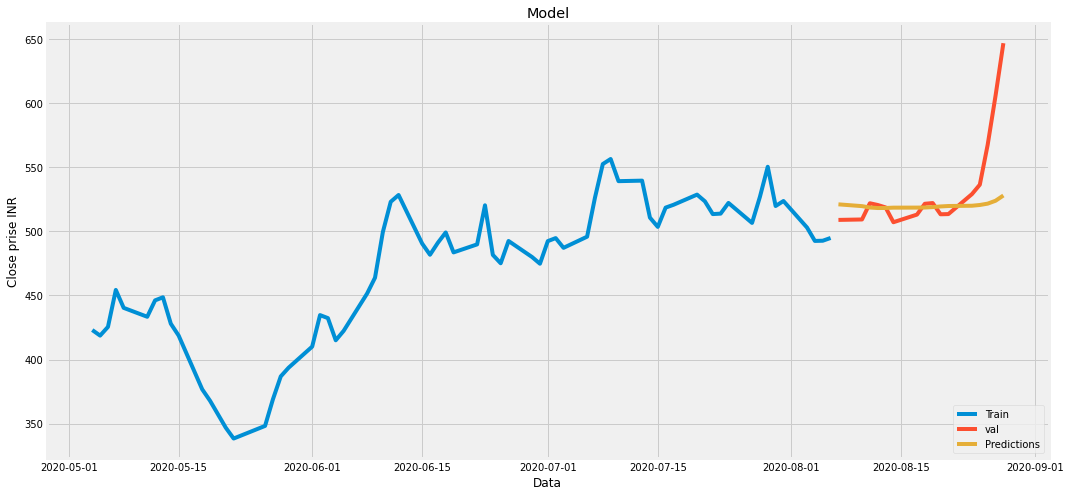

In [ ]:
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Data')
plt.ylabel('Close prise INR')
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','val','Predictions'],loc='lower right')
plt.show()

In [ ]:
#show the valid and predicted value
valid

,Close,Predictions
Date,,
2020-08-07,509.000000,476.354492
2020-08-10,509.350006,475.210785
2020-08-11,522.000000,474.335785
2020-08-12,520.650024,473.992462
2020-08-13,518.750000,473.999115
2020-08-14,507.200012,474.195618
2020-08-17,513.150024,474.226746
2020-08-18,521.599976,474.271301
2020-08-19,522.150024,474.520782


In [ ]:
#get the quote
sbi_quote=web.DataReader('SBIN.NS',data_source='yahoo',start='2020-01-15', end='2020-04-20')
new_df=sbi_quote.filter(['Close'])
last_60_days=new_df[-60:].values
last_60_days_scaled=scaler.transform(last_60_days)
x_test=[]
x_test.append(last_60_days_scaled)
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
pred_price=model.predict(x_test)
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

[[187.79398]]


In [ ]:
sbi_quote2=web.DataReader('SBIN.NS',data_source='yahoo',start='2020-04-20', end='2020-04-20')
print(sbi_quote2['Close'])

Date
2020-04-20    192.5
Name: Close, dtype: float64


In [ ]:
z